In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

COLOR = "black"
mpl.rcParams["text.color"] = "black"
mpl.rcParams["axes.labelcolor"] = COLOR
mpl.rcParams["xtick.color"] = COLOR
mpl.rcParams["ytick.color"] = COLOR

MC Run

In [2]:
import pickle

with open("2_saved_runs/df_scores_221118.pickle", "rb") as handle:
    df_scores = pickle.load(handle)
with open("2_saved_runs/MC_run_221118_v2.pickle", "rb") as handle:
    results_mc = pickle.load(handle)
df_results, model_data = results_mc["df_results"], results_mc["model_data"]

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
# cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 75
init_routine = "random_inside"
criterion = "Total_rank_rank"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine), :].sort_values(
    criterion
)
# df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.number_identified_cluster.max())} identified clusters")
df_select.iloc[:50]

best model: 5 identified clusters


,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster
13546,13546,1000,3.196398,3.196398,1000,46,0,75,random_inside,3,6,173.732346,-161.732346,-139.923608,-149.617391,0.354210,219.492419,0.920481,2,1,1,1,1,95,1,6,1,2.0
13542,13542,1000,2.905300,2.905300,1000,42,0,75,random_inside,3,6,173.731992,-161.731992,-139.923254,-149.617032,0.354210,219.492419,0.920481,3,2,2,4,1,95,3,12,2,2.0
13543,13543,1000,3.842465,3.845891,1002,43,2,75,random_inside,3,6,173.731990,-161.731990,-139.923253,-149.617051,0.354210,219.492419,0.920481,4,3,3,2,1,95,2,13,3,2.0
13541,13541,1000,3.678787,3.678787,1000,41,0,75,random_inside,3,6,173.731962,-161.731962,-139.923224,-149.617038,0.354210,219.492419,0.920481,5,4,4,3,1,95,4,17,4,2.0
13554,13554,1000,4.475962,4.487840,1004,54,4,75,random_inside,3,6,173.731708,-161.731708,-139.922970,-149.616777,0.354210,219.492419,0.920481,6,5,5,6,1,95,5,23,5,2.0
13540,13540,1000,3.589091,3.589091,1000,40,0,75,random_inside,3,6,173.731702,-161.731702,-139.922965,-149.616778,0.354210,219.492419,0.920481,7,6,6,5,1,95,6,25,6,2.0
13553,13553,1000,3.410007,3.413203,1002,53,2,75,random_inside,3,6,173.731603,-161.731603,-139.922865,-149.616667,0.354210,219.492419,0.920481,8,7,7,7,1,95,7,30,7,2.0
13547,13547,1000,4.582471,4.582471,1000,47,0,75,random_inside,3,6,173.731587,-161.731587,-139.922850,-149.616645,0.354210,219.492419,0.920481,9,8,8,8,1,95,8,34,8,2.0
13549,13549,1000,5.487367,5.489299,1001,49,1,75,random_inside,3,6,173.731548,-161.731548,-139.922810,-149.616630,0.354210,219.492419,0.920481,10,9,9,9,1,95,9,38,9,2.0
13552,13552,1000,3.312869,3.316629,1002,52,2,75,random_inside,3,6,173.731539,-161.731539,-139.922802,-149.616629,0.354210,219.492419,0.920481,11,10,10,10,1,95,10,42,10,2.0


In [4]:
from clustering.model_selection.multi_model_mimicry.multi_model_mimicry import MultiModelMimicryParameter

mmm_params = {
    "N_bs": 50,
    "criterion": "ll_score",
    "n_neighbors": 10,
    "pca_n_components": 2,
    "N_runs_per_clusternumber": 1,
    "emc": {
        "save_data": False,
        "path_to_save": None,
        "parallel": {"n_jobs": 12, "verbose": 11},
        "cluster_init": {
            "init_routine": "random_inside",
            "routine": {
                "N_runs_per_clusternumber": 1,
                "N_max": 5000,
            },
        },
        "em": {
            "max_reiterations": 5000,
            "em_algorithm": {
                "em_tol": 1e-3,
                "max_iter": 1000,
                "min_mix_coef": 0.02,
                "abs_tol_params": 1e-08,
                "minimizer_options": {"maxiter": 100},
            },
        },
    },
}

In [5]:
from clustering.model_selection.multi_model_mimicry.multi_model_mimicry import MultiModelMimicry
mmm = MultiModelMimicry(df_scores, model_data, **mmm_params)
mmm.run()

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    5.0s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    5.1s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    5.2s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    5.5s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    5.7s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    5.8s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    5.9s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    6.1s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:  

In [6]:
print(mmm.predict_model())
print(mmm.knn_model_probabilities)
print(mmm.candidate_model_idxs)

['data_model_13757']
[[0.3 0.3 0.4]]
[13710, 13725, 13757]


c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [9]:
mmm.candidate_model_idxs

[13546, 13578, 13597, 13637]

c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


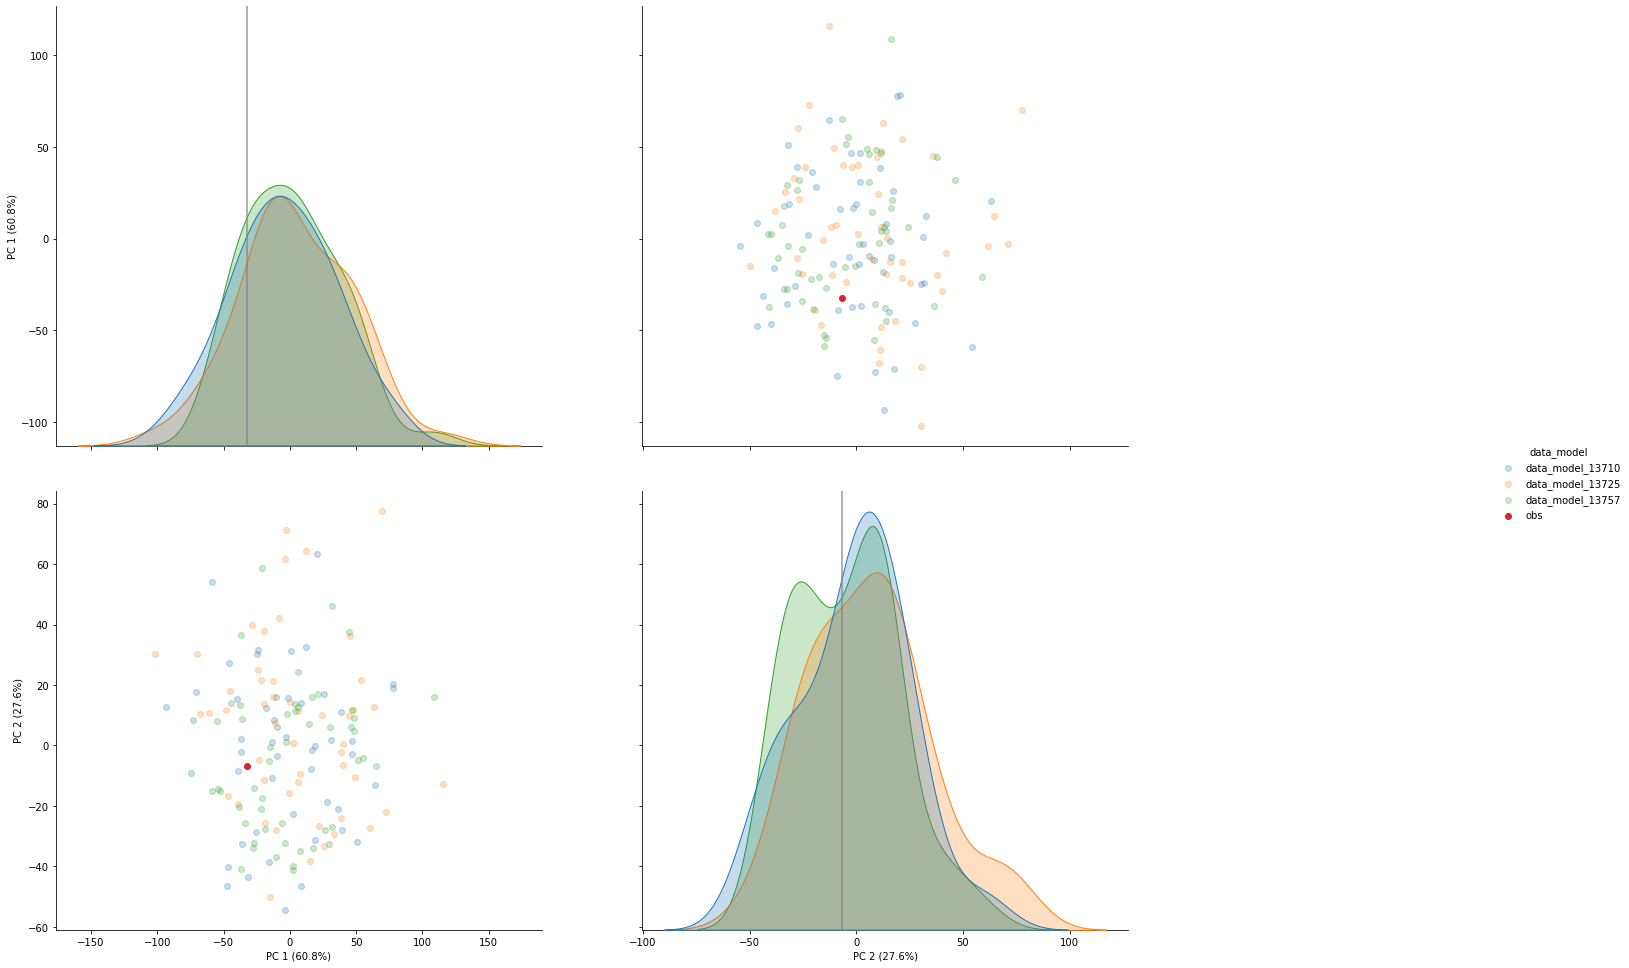

In [7]:
mmm.plot_gofs_PCA_components()

In [ ]:
mmm.knn_model_probabilities

array([[0.6, 0.2, 0.1, 0.1, 0. ]])

In [ ]:
df = mmm.df_gofs  # df_plot
X = df.loc[df.data_model != "obs", ~df.columns.isin(["data_model"])].to_numpy()
y = df.loc[df.data_model != "obs", df.columns.isin(["data_model"])].to_numpy()
X_obs = df.loc[df.data_model == "obs", ~df.columns.isin(["data_model"])].to_numpy()
knn = KNN(n_neighbors=10)
knn.fit(X, y)
knn.predict_proba(X_obs)

c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[0.6, 0.2, 0.1, 0.1, 0. ]])

In [ ]:
df_plot.isna().sum()

PC 1 (50.0%)    0
PC 2 (20.4%)    0
data_model      0
dtype: int64

In [ ]:
df_plot[df_plot.data_model == "obs"].iloc[0, i]

-11.166532525216747

c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


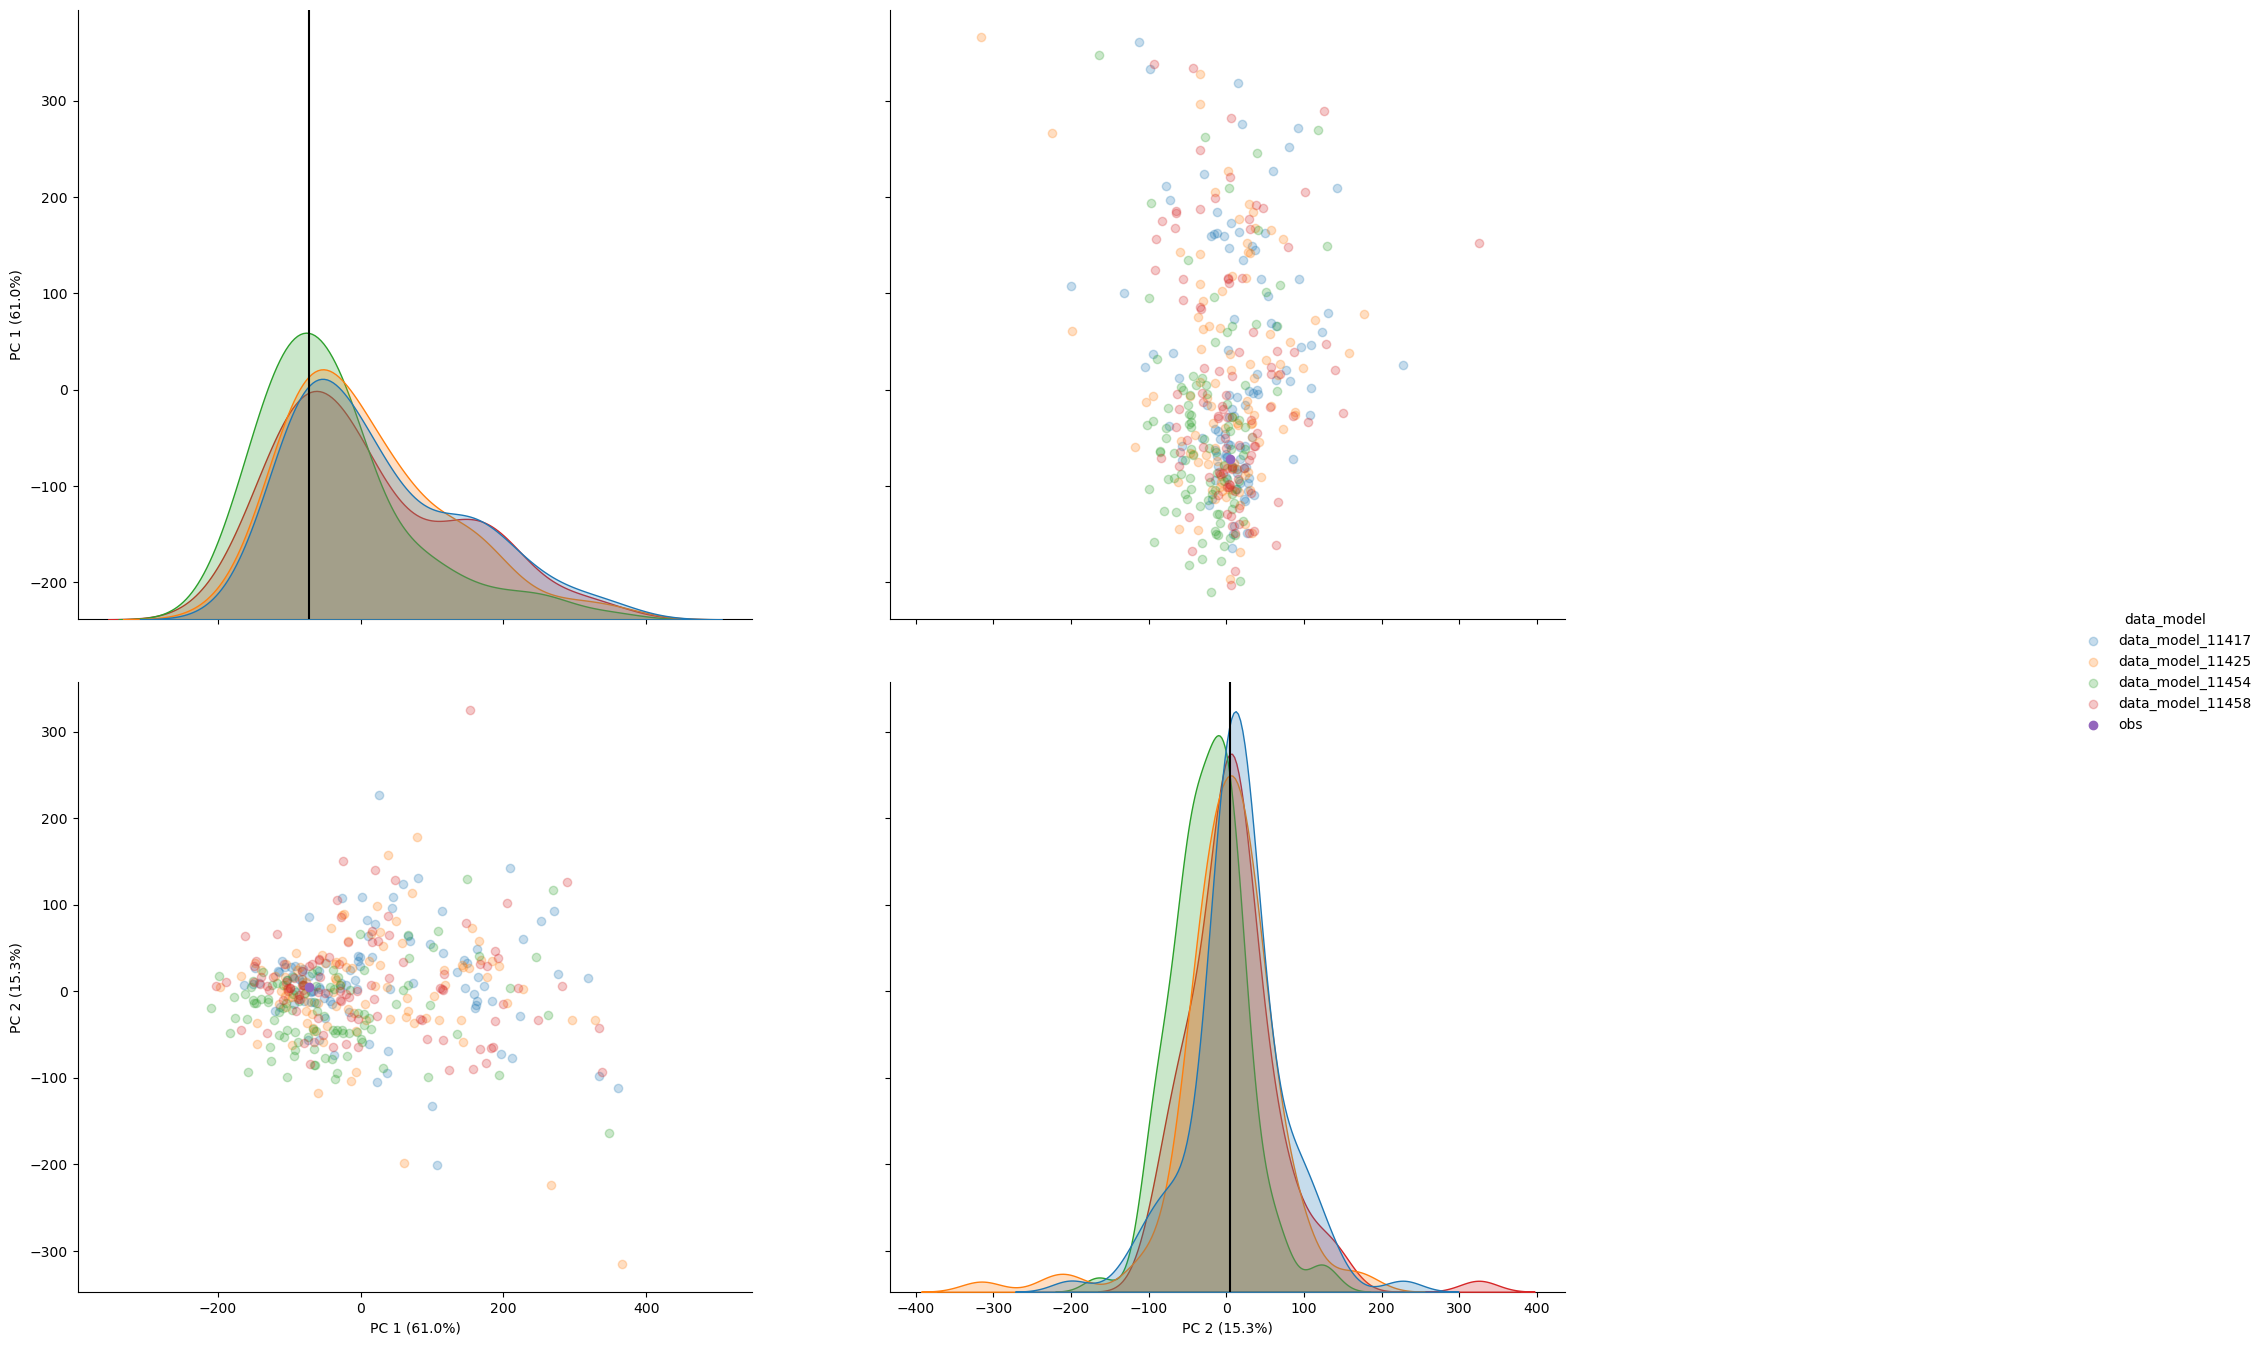

In [ ]:
n_components = 2
df = mmm.df_gofs.copy()
features = [col for col in df.columns if "model_" in col]
pca = PCA()
components = pca.fit_transform(df[features])[:, :n_components]
labels = {str(i): f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}
df_pca = pd.DataFrame.from_dict({labels[str(i)]: components[:, i] for i in range(n_components)})
df_pca["data_model"] = df["data_model"]
alpha_models, alpha_obs = 0.25, 1
df_plot = df_pca
g = sns.PairGrid(df_plot, hue="data_model", hue_kws={"alpha": [alpha_models] * (len(df.columns) - 1) + [alpha_obs]})
g = g.map_diag(sns.kdeplot, shade=True)  #
g = g.map_lower(plt.scatter)
g = g.map_upper(plt.scatter)
g = g.add_legend()
fig = plt.gcf()
fig.set_size_inches(25, 15)
# vertical grey line on diagonal for observed gof for better visual inspecting
axs = [ax for ax in fig.axes if ax.get_ylabel() == "Density"]
for i, ax in enumerate(axs):
    ax.axvline(x=df_plot[df_plot.data_model == "obs"].iloc[0, i], color="black")

In [ ]:
mmm.knn_model_probabilities

array([[0. , 0.6, 0.1, 0.3]])

In [ ]:
model_idx = 11464
df_pred = get_prediction_df(df_scores, model_data, model_idx)
df_pred_count_points = df_pred.groupby(["prediction_cluster"]).agg({"x": "count"}).reset_index()
useful_cluster = df_pred_count_points[df_pred_count_points.x > 1].prediction_cluster
df_pred[df_pred.prediction_cluster.isin(useful_cluster)]

,x,y,cluster,gamma_0,gamma_1,gamma_2,gamma_3,gamma_4,gamma_5,gamma_6,prediction_cluster,identified_as_cluster
0,0.000591,6.954919,0,3.824426e-17,1.436347e-12,9.999994e-01,4.459271e-16,4.934762e-20,5.647016e-07,2.182647e-232,2,0
1,0.001493,6.141623,0,2.612083e-08,4.867596e-09,9.999936e-01,2.940580e-11,2.475148e-15,6.323611e-06,2.720424e-176,2,0
2,0.003148,6.176678,0,1.699447e-08,4.792302e-09,9.999914e-01,2.901454e-11,2.303553e-15,8.556611e-06,2.271082e-178,2,0
3,0.002601,7.471831,0,7.044138e-24,1.643799e-14,9.999995e-01,5.752314e-19,1.069213e-22,5.035647e-07,2.116939e-271,2,0
4,0.009031,6.204427,0,2.887258e-08,1.192104e-08,9.999645e-01,9.763562e-11,6.414630e-15,3.542212e-05,1.686506e-179,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.028336,1.806228,6,8.045244e-18,6.270694e-01,7.984501e-16,3.178029e-02,3.158706e-01,2.527961e-02,1.519445e-08,1,4
7,0.046373,1.488766,6,1.522896e-22,2.914852e-01,1.989290e-19,1.827872e-02,6.431381e-01,4.700751e-02,9.054016e-05,4,2
8,0.009999,1.667608,6,1.596611e-19,7.058688e-01,6.695073e-15,7.090548e-03,2.752772e-01,1.176323e-02,2.813468e-07,1,4
9,0.002605,1.880983,6,1.254324e-16,8.403879e-01,4.780178e-13,9.632648e-03,1.424556e-01,7.523900e-03,3.969504e-10,1,4


In [ ]:
df_pred

,x,y,cluster,gamma_0,gamma_1,gamma_2,gamma_3,gamma_4,gamma_5,gamma_6,prediction_cluster,identified_as_cluster
0,0.000591,6.954919,0,3.824426e-17,1.436347e-12,9.999994e-01,4.459271e-16,4.934762e-20,5.647016e-07,2.182647e-232,2,0
1,0.001493,6.141623,0,2.612083e-08,4.867596e-09,9.999936e-01,2.940580e-11,2.475148e-15,6.323611e-06,2.720424e-176,2,0
2,0.003148,6.176678,0,1.699447e-08,4.792302e-09,9.999914e-01,2.901454e-11,2.303553e-15,8.556611e-06,2.271082e-178,2,0
3,0.002601,7.471831,0,7.044138e-24,1.643799e-14,9.999995e-01,5.752314e-19,1.069213e-22,5.035647e-07,2.116939e-271,2,0
4,0.009031,6.204427,0,2.887258e-08,1.192104e-08,9.999645e-01,9.763562e-11,6.414630e-15,3.542212e-05,1.686506e-179,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.028336,1.806228,6,8.045244e-18,6.270694e-01,7.984501e-16,3.178029e-02,3.158706e-01,2.527961e-02,1.519445e-08,1,4
7,0.046373,1.488766,6,1.522896e-22,2.914852e-01,1.989290e-19,1.827872e-02,6.431381e-01,4.700751e-02,9.054016e-05,4,2
8,0.009999,1.667608,6,1.596611e-19,7.058688e-01,6.695073e-15,7.090548e-03,2.752772e-01,1.176323e-02,2.813468e-07,1,4
9,0.002605,1.880983,6,1.254324e-16,8.403879e-01,4.780178e-13,9.632648e-03,1.424556e-01,7.523900e-03,3.969504e-10,1,4


In [ ]:
df_pred[df_pred.identified_as_cluster == "noise"]

,x,y,cluster,gamma_0,gamma_1,gamma_2,gamma_3,gamma_4,gamma_5,gamma_6,prediction_cluster,identified_as_cluster
1,0.134387,-1.671395,5,7.082915e-95,9.819960e-08,1.200503e-51,7.077986e-14,0.011788,0.988211,1.705527e-32,5,noise


c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


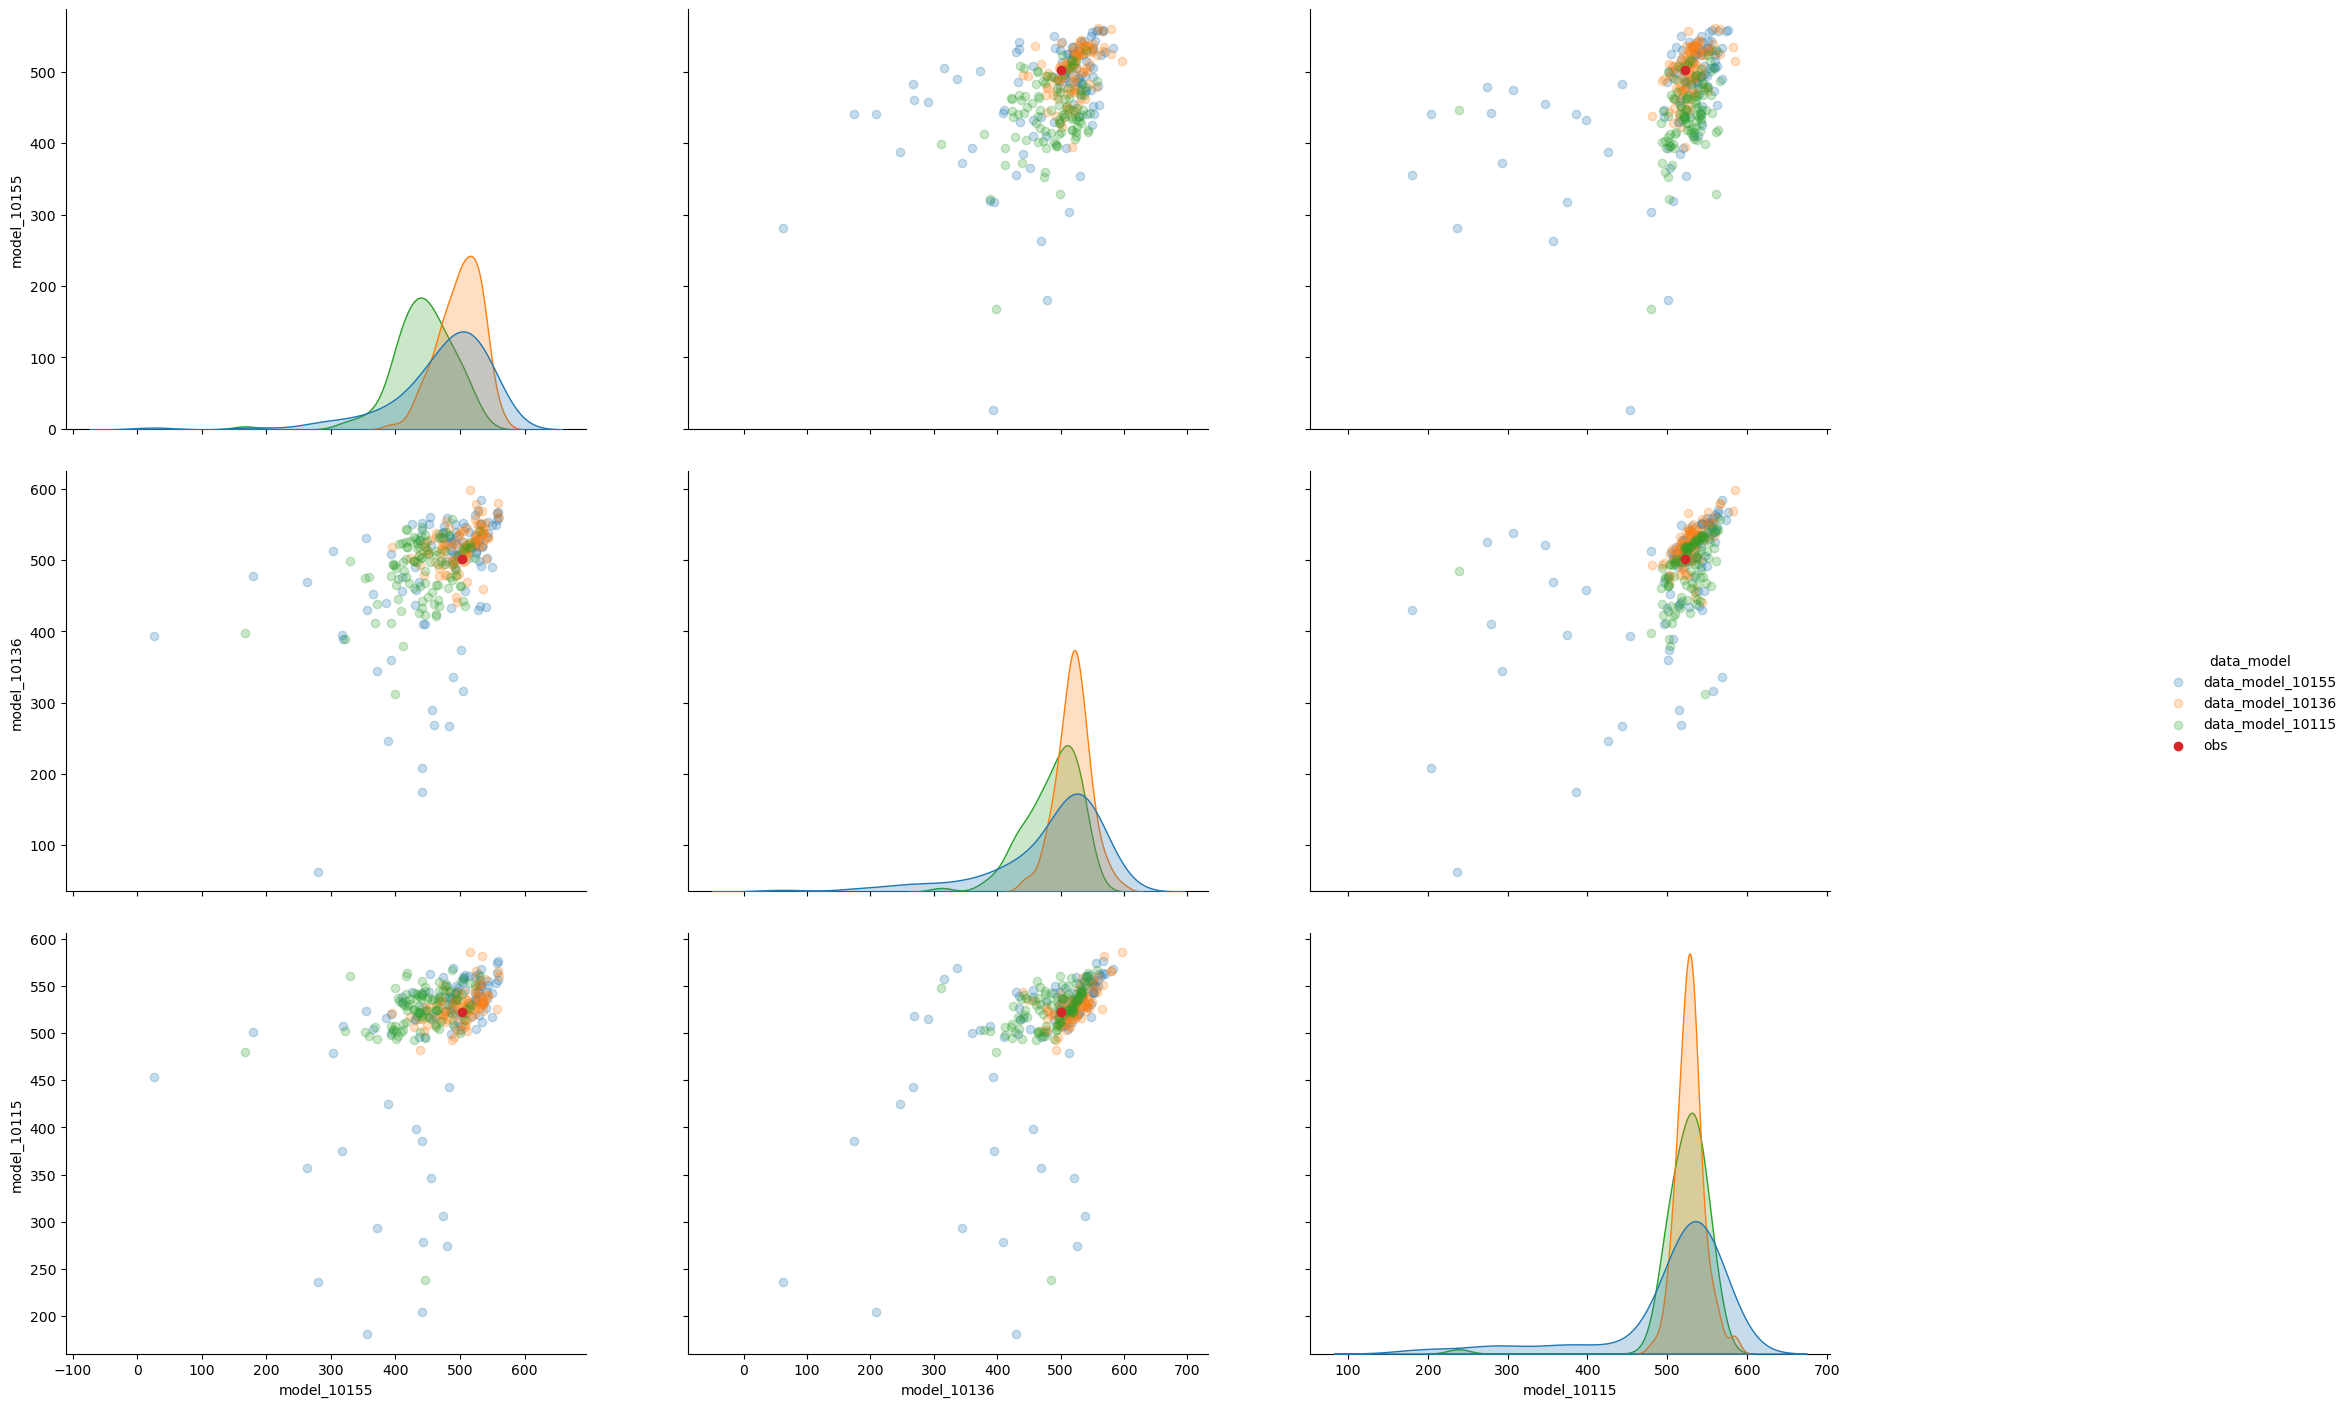

In [ ]:
mmm.plot_gofs()

In [ ]:
mmm.df_gofs

,model_7224,model_7231,model_7218,data_model
0,-602.038078,-598.691435,-609.432179,data_model_7224
1,-612.274388,-623.183111,-619.668481,data_model_7224
2,-602.404654,-602.414601,-606.743502,data_model_7224
3,-598.086054,-596.553073,-605.480951,data_model_7224
4,-615.743015,-615.742093,-623.137099,data_model_7224
5,-626.113646,-626.116856,-627.757342,data_model_7224
6,-641.788858,-641.902370,-636.000199,data_model_7224
7,-592.595445,-592.595327,-589.874898,data_model_7224
8,-615.780968,-615.780982,-623.175044,data_model_7224
9,-637.683716,-657.781260,-645.077994,data_model_7224


In [ ]:
df = mmm.df_gofs
X = df.loc[df.data_model != "obs", ~df.columns.isin(["data_model"])].to_numpy()
y = df.loc[df.data_model != "obs", df.columns.isin(["data_model"])].to_numpy()

X_obs = df.loc[df.data_model == "obs", ~df.columns.isin(["data_model"])].to_numpy()

from sklearn.neighbors import KNeighborsClassifier as KNN


knn = KNN(n_neighbors=10)
knn.fit(X, y)
knn.predict(X_obs)

c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['data_model_10136'], dtype=object)

c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


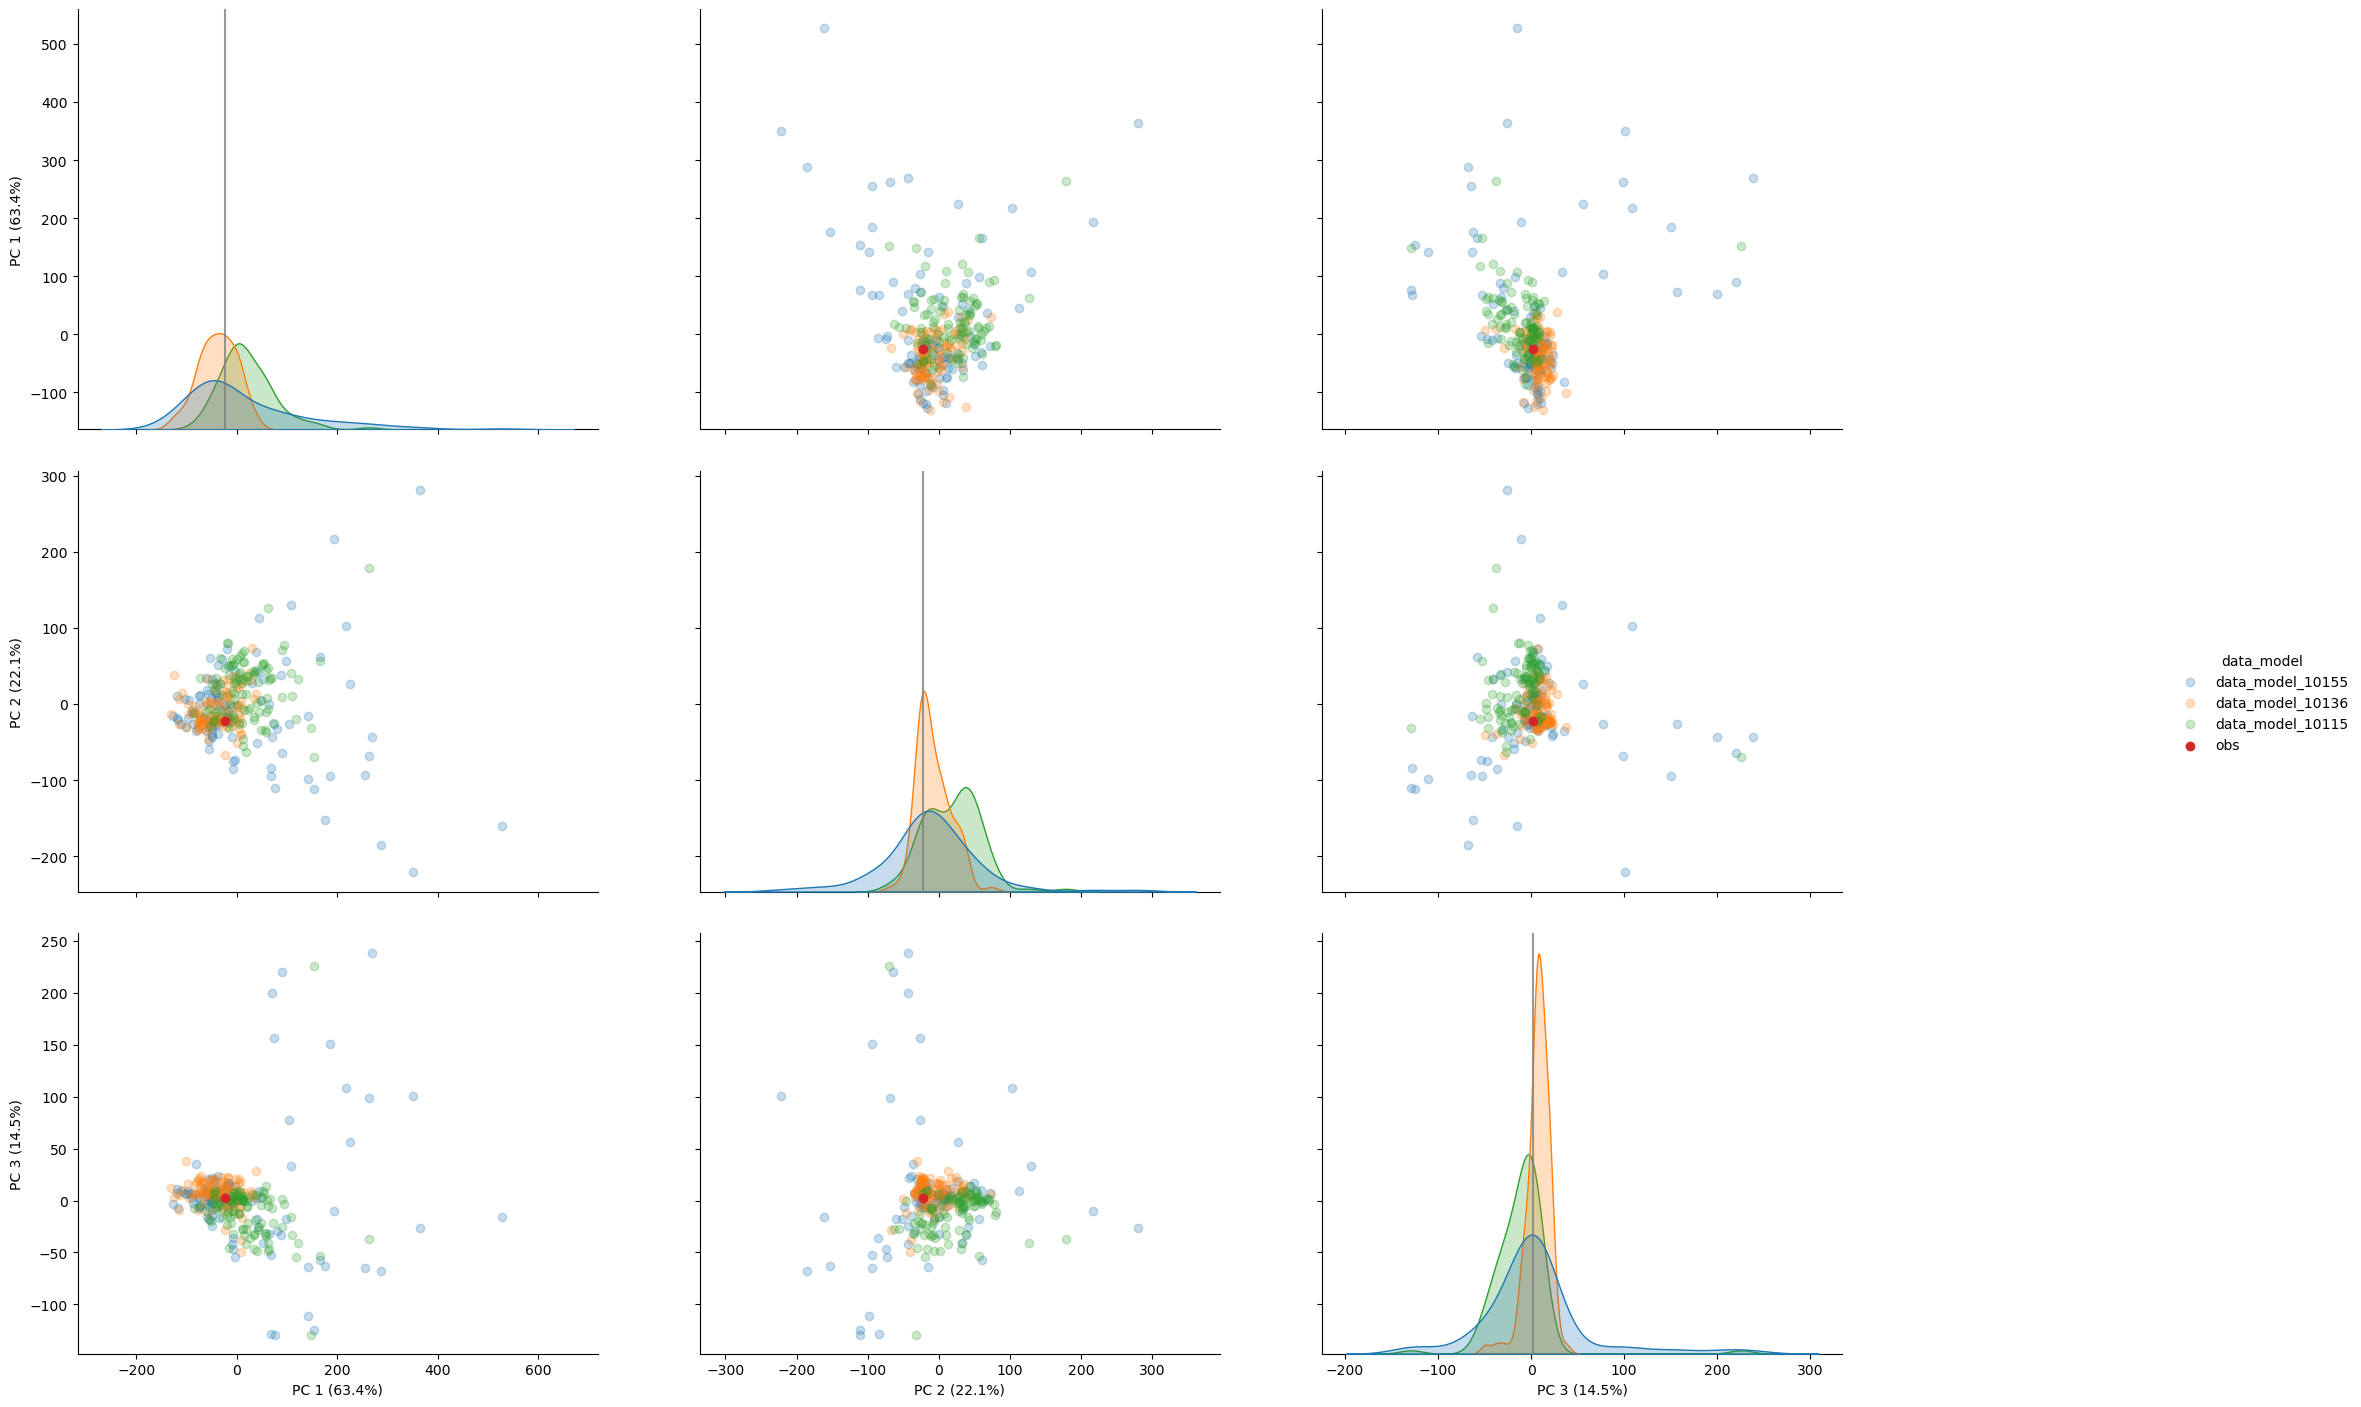

In [ ]:
COLOR = "black"
mpl.rcParams["text.color"] = "black"
mpl.rcParams["axes.labelcolor"] = COLOR
mpl.rcParams["xtick.color"] = COLOR
mpl.rcParams["ytick.color"] = COLOR


features = [col for col in df.columns if "model_" in col]
n_components = 3
pca = PCA()
components = pca.fit_transform(df[features])[:, :n_components]
labels = {str(i): f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}
df_pca = pd.DataFrame.from_dict({labels[str(i)]: components[:, i] for i in range(n_components)})
df_pca["data_model"] = df["data_model"]


alpha_models, alpha_obs = 0.25, 1
df_plot = df_pca
g = sns.PairGrid(df_plot, hue="data_model", hue_kws={"alpha": [alpha_models, alpha_models, alpha_models, alpha_obs]})
g = g.map_diag(sns.kdeplot, shade=True)  # sns.kdeplot, shade=True
g = g.map_lower(plt.scatter)
g = g.map_upper(plt.scatter)
g = g.add_legend()
fig = plt.gcf()
fig.set_size_inches(25, 15)

axs = [ax for ax in fig.axes if ax.get_ylabel() == "Density"]
for i, ax in enumerate(axs):
    ax.axvline(x=df_plot[df_plot.data_model == "obs"].iloc[0, i], color="grey", alpha=0.8, label="obs_")

In [ ]:
fig.axes

[<AxesSubplot:ylabel='PC 1 (63.4%)'>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:ylabel='PC 2 (22.1%)'>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:xlabel='PC 1 (63.4%)', ylabel='PC 3 (14.5%)'>,
 <AxesSubplot:xlabel='PC 2 (22.1%)'>,
 <AxesSubplot:xlabel='PC 3 (14.5%)'>,
 <AxesSubplot:xlabel='PC 1 (63.4%)', ylabel='Count'>,
 <AxesSubplot:xlabel='PC 2 (22.1%)', ylabel='Count'>,
 <AxesSubplot:xlabel='PC 3 (14.5%)', ylabel='Count'>]

In [ ]:
df_plot

,PC 1 (63.4%),PC 2 (22.1%),PC 3 (14.5%),data_model
0,-87.846275,-25.799050,-2.776577,data_model_10155
1,-74.639055,0.125717,-7.622308,data_model_10155
2,-2.774240,44.002132,14.438027,data_model_10155
3,-14.850461,-13.982914,16.688677,data_model_10155
4,-55.802196,-48.755882,-6.131488,data_model_10155
...,...,...,...,...
296,-73.101536,33.693684,-4.183784,data_model_10115
297,-42.468829,-16.211131,10.349915,data_model_10115
298,-10.034588,16.972140,4.411178,data_model_10115
299,107.945367,41.224043,-15.408690,data_model_10115


[<AxesSubplot:xlabel='PC 1 (63.4%)', ylabel='Density'>,
 <AxesSubplot:xlabel='PC 2 (22.1%)', ylabel='Density'>,
 <AxesSubplot:xlabel='PC 3 (14.5%)', ylabel='Density'>]

In [ ]:
axs = [ax for ax in fig.axes if ax.get_ylabel() == "Density"]
for i, ax in enumerate(axs):
    ax.axvline(x=df_plot[df_plot.data_model == "obs"].iloc[0, i], color="black", alpha=0.8, label="obs_")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


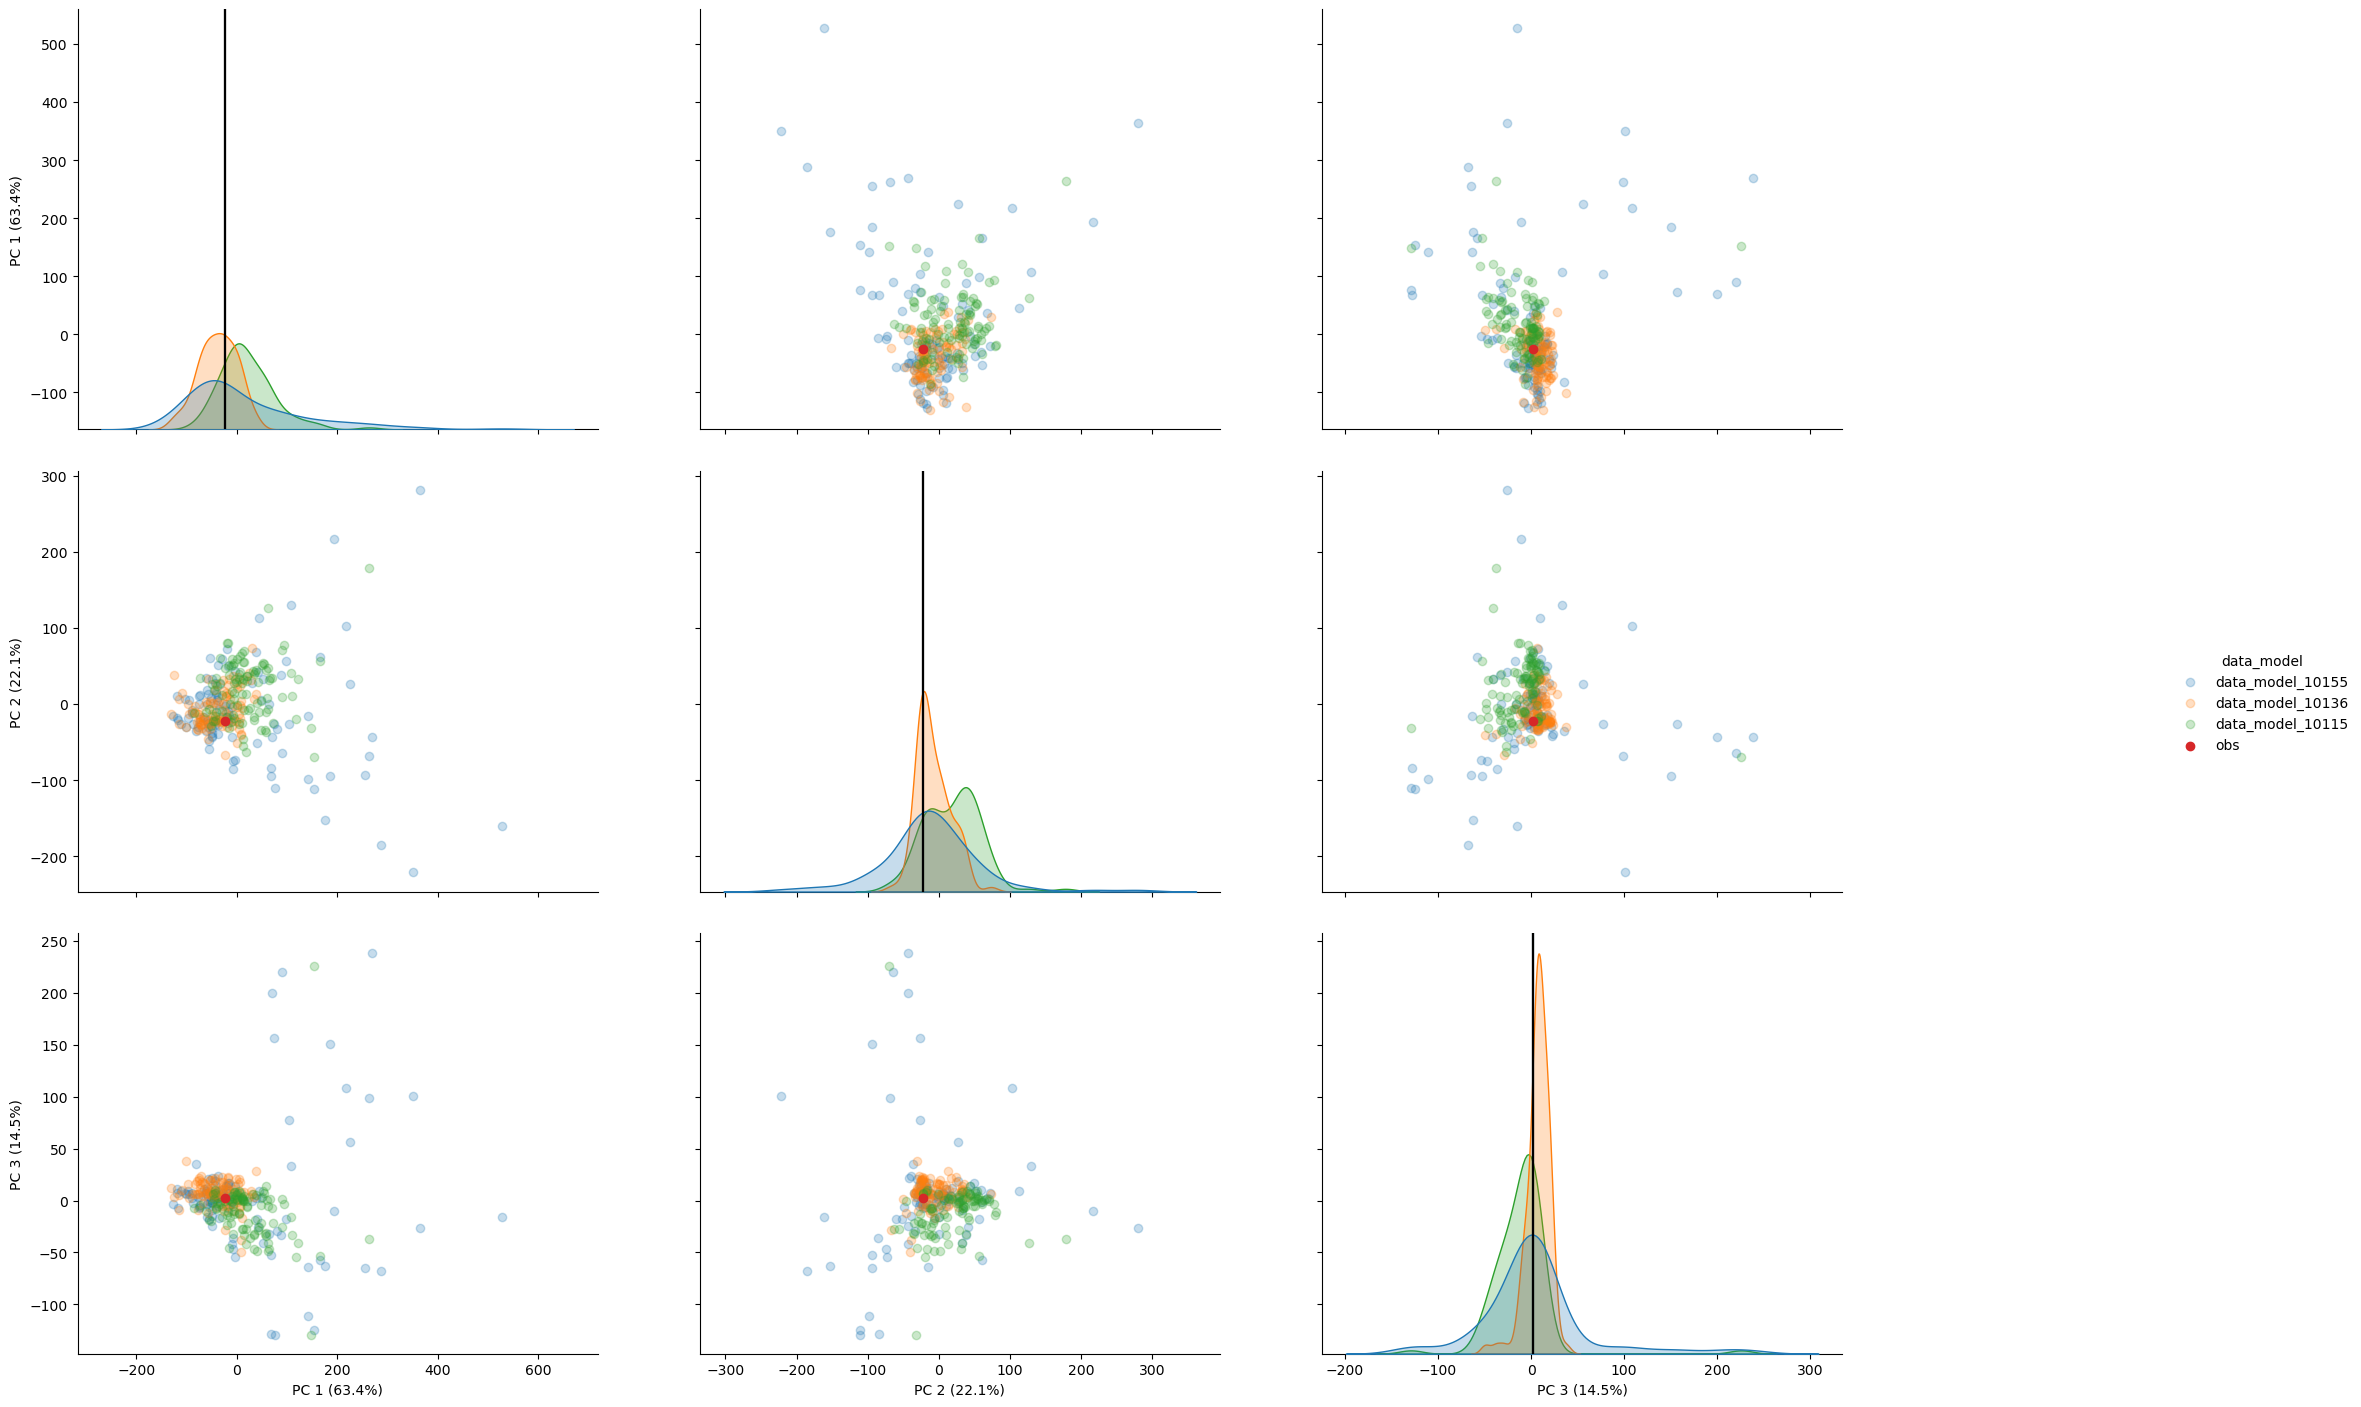

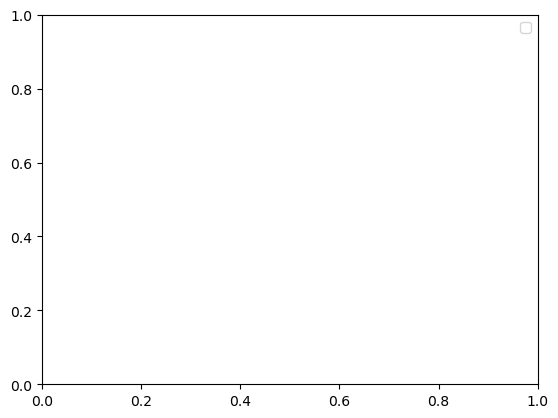

In [ ]:
fig

In [ ]:
fig = plt.gcf()

<Figure size 640x480 with 0 Axes>

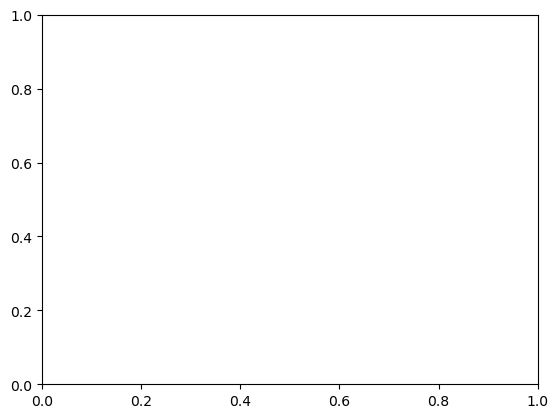

In [ ]:
ax = plt.gca()

In [ ]:
mmm.df_gofs

,model_7224,model_7231,model_7218,data_model
0,-602.038078,-598.691435,-609.432179,data_model_7224
1,-612.274388,-623.183111,-619.668481,data_model_7224
2,-602.404654,-602.414601,-606.743502,data_model_7224
3,-598.086054,-596.553073,-605.480951,data_model_7224
4,-615.743015,-615.742093,-623.137099,data_model_7224
5,-626.113646,-626.116856,-627.757342,data_model_7224
6,-641.788858,-641.902370,-636.000199,data_model_7224
7,-592.595445,-592.595327,-589.874898,data_model_7224
8,-615.780968,-615.780982,-623.175044,data_model_7224
9,-637.683716,-657.781260,-645.077994,data_model_7224


c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


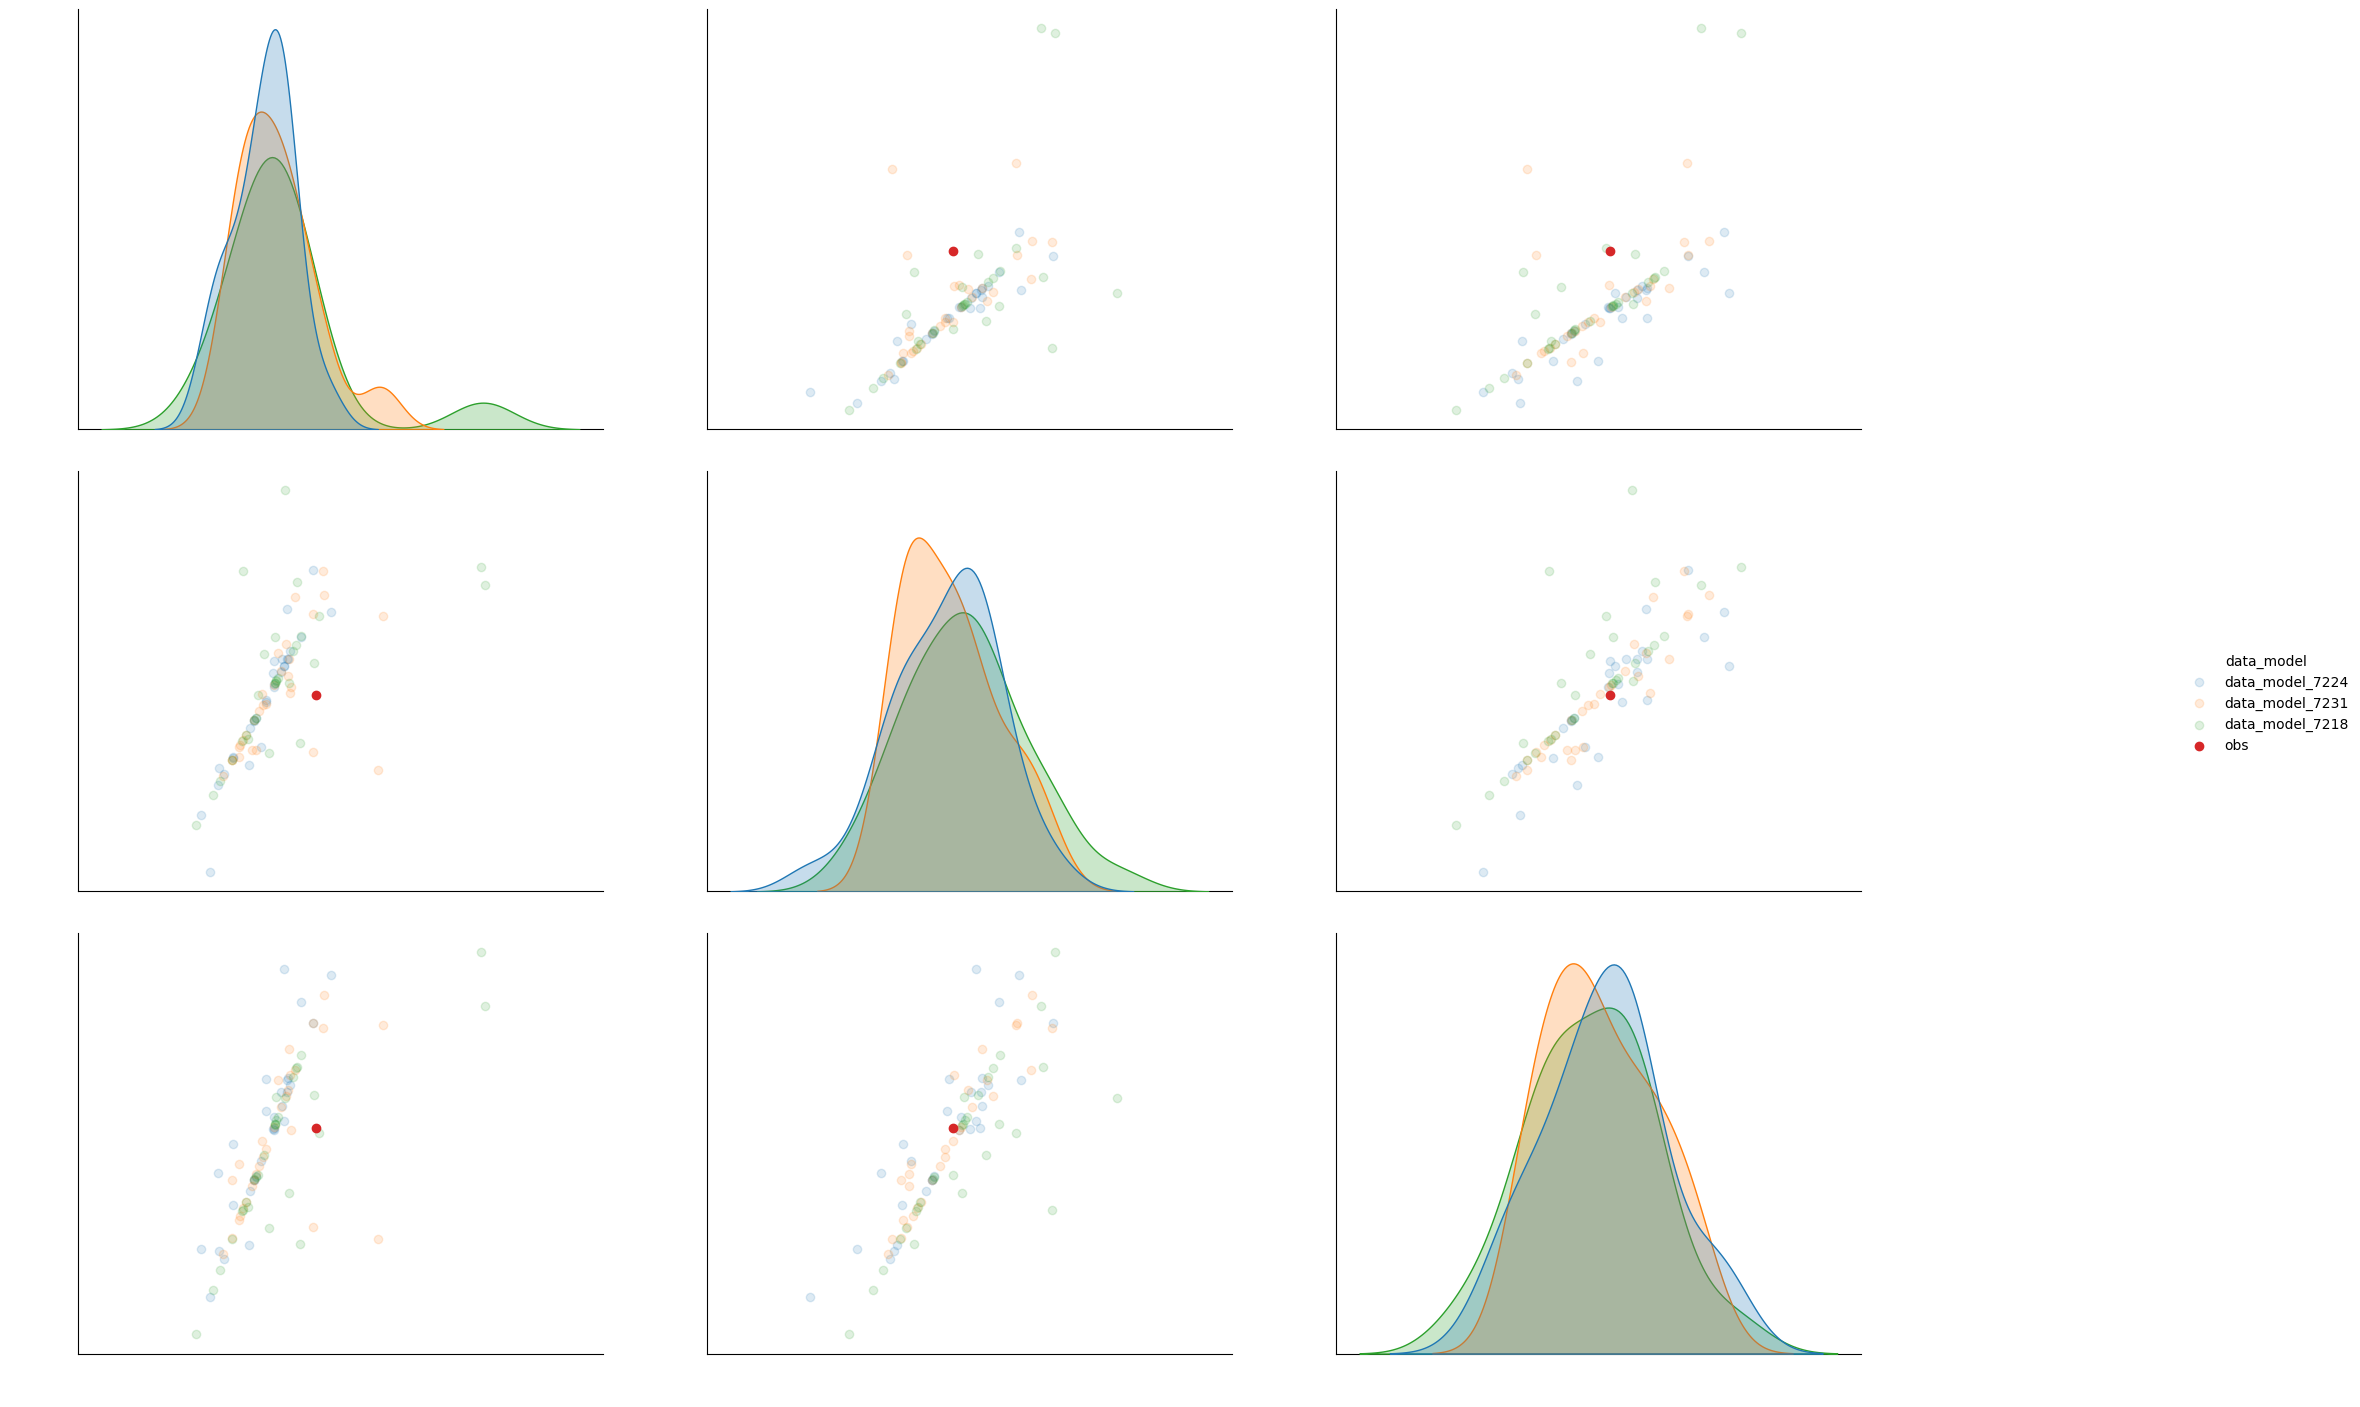

In [ ]:
mmm.plot_gofs()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

# df = px.data.iris()
features = ["model_0", "model_1", "model_2", "model_3", "model_4"]
n_components = 2
pca = PCA()
components = pca.fit_transform(df[features])
labels = {str(i): f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)}

fig = px.scatter_matrix(
    components[:, :n_components], labels=labels, dimensions=range(n_components), color=df["data_model"]
)
fig.update_traces(diagonal_visible=False)
fig.write_html("test.html")
# fig.show()

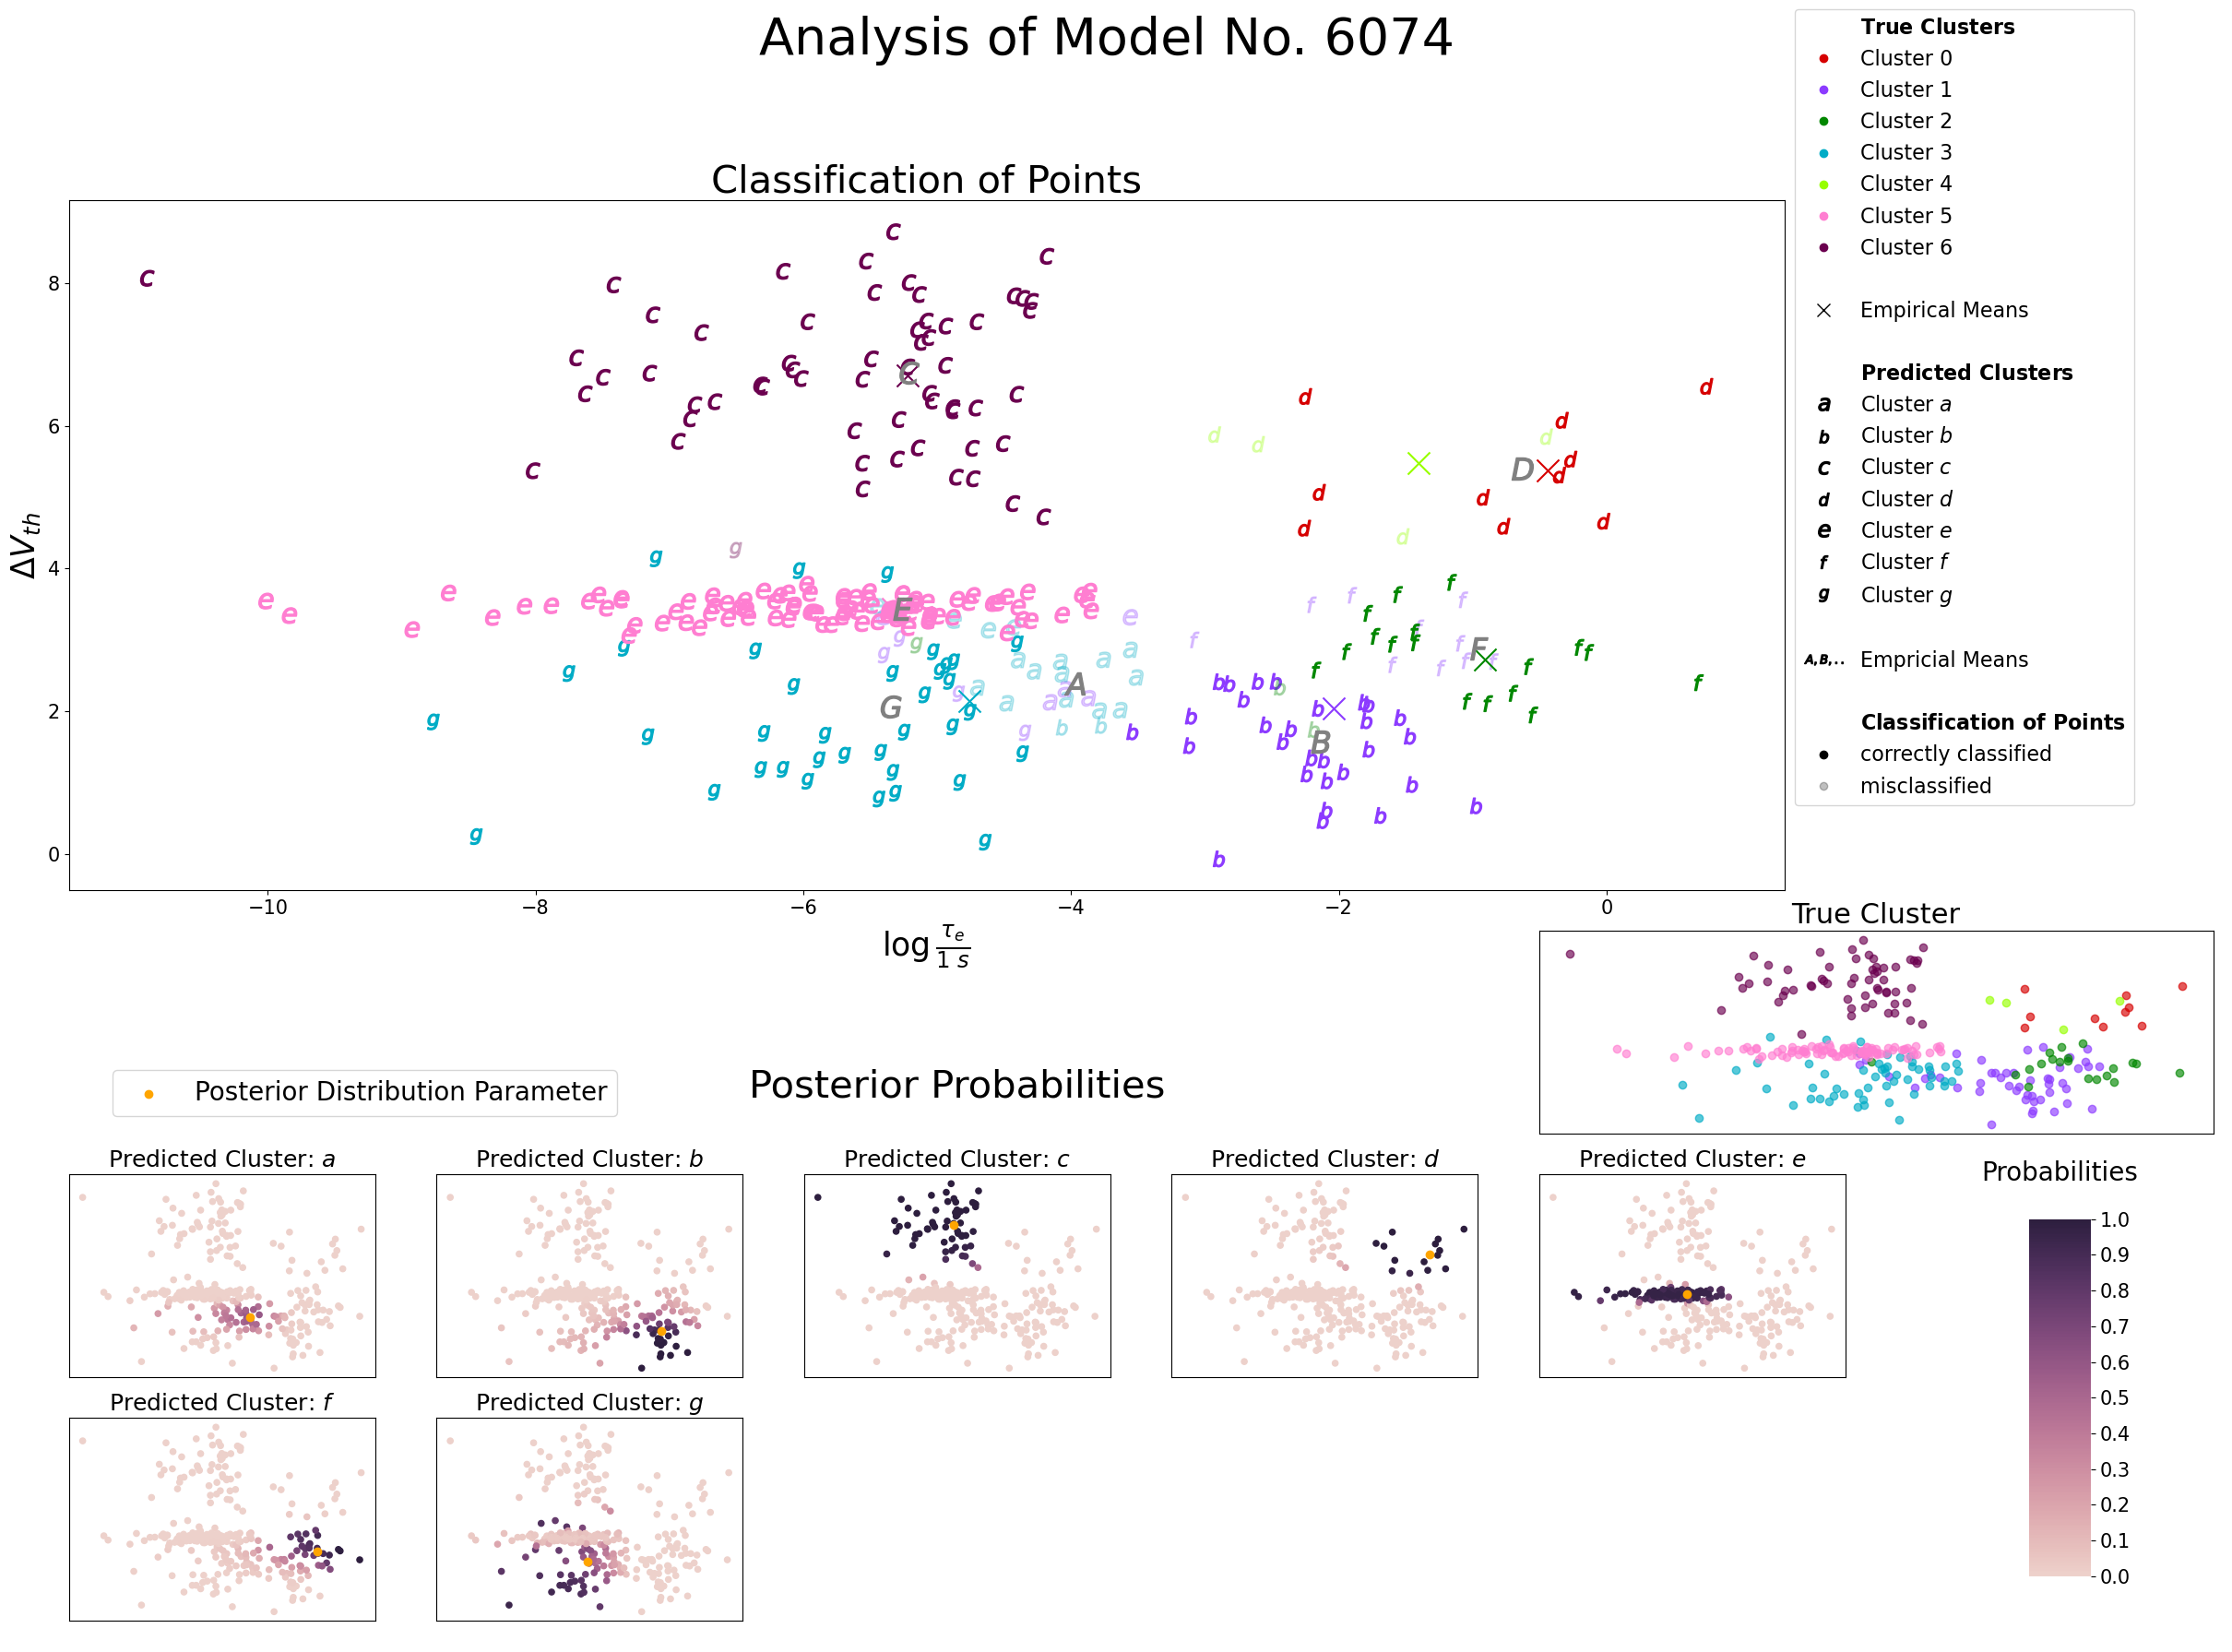

In [ ]:
from plotting.clustering_assessment.plot import plot_clustering_assessment

model_idx = 6074
# criterion = "TOTAL_rank"

plot_clustering_assessment(model_data, df_scores, model_idx)

In [ ]:
[6028, 6006, 6074]

In [ ]:
pd.set_option("display.max_columns", None)
# cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 33
init_routine = "random_inside"
criterion = "Total_rank_rank"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine), :].sort_values(
    criterion
)
# df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.number_identified_cluster.max())} identified clusters")
df_select.iloc[0:100]

best model: 6 identified clusters


,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster
6028,6028,141,2.791921,2.820657,150,88,9,33,random_inside,5,7,244.871946,-224.871946,-188.138713,-210.259260,0.406927,387.280439,0.928983,1,1,12,1,14,4,43,29,1,5.0
6024,6024,85,4.650675,4.663433,89,84,4,33,random_inside,5,7,244.863777,-224.863777,-188.130545,-210.250978,0.406927,387.280439,0.928983,2,2,13,2,14,4,44,33,2,5.0
6020,6020,116,4.820253,4.914843,146,80,30,33,random_inside,5,7,244.862003,-224.862003,-188.128771,-210.249298,0.406927,387.280439,0.928983,3,3,14,3,14,5,45,37,3,5.0
6030,6030,101,3.428561,3.478590,119,90,18,33,random_inside,5,7,244.737111,-224.737111,-188.003878,-210.122884,0.406927,387.280439,0.928981,4,4,15,4,14,4,46,41,4,5.0
6006,6006,70,3.087900,3.091625,71,66,1,33,random_inside,4,7,237.850399,-221.850399,-192.463813,-207.185012,0.390774,260.835140,0.926607,6,6,1,6,24,56,55,43,5,4.0
6023,6023,52,2.429704,2.501223,70,83,18,33,random_inside,5,7,244.735736,-224.735736,-188.002503,-210.121331,0.406927,387.280439,0.928981,5,5,16,5,14,5,47,45,6,5.0
6019,6019,60,2.691012,2.691012,60,79,0,33,random_inside,4,7,237.831562,-221.831562,-192.444975,-207.166079,0.390774,260.835140,0.926606,7,7,2,7,24,56,56,47,7,4.0
6002,6002,77,3.488606,3.501210,81,62,4,33,random_inside,4,7,237.830594,-221.830594,-192.444008,-207.165153,0.390774,260.835140,0.926606,8,8,3,8,24,57,57,51,8,4.0
6016,6016,71,3.392394,3.392394,71,76,0,33,random_inside,4,7,237.827863,-221.827863,-192.441277,-207.162461,0.390774,260.835140,0.926606,9,9,4,9,24,57,58,55,9,4.0
6015,6015,70,3.356992,3.373865,77,75,7,33,random_inside,4,7,237.827652,-221.827652,-192.441066,-207.162116,0.390774,260.835140,0.926606,10,10,5,10,24,57,59,59,10,4.0
